/home/satyam/anaconda3/lib/python3.7/site-packages/Bio/__init__.py:128: BiopythonWarning: You may be importing Biopython from inside the source tree. This is bad practice and might lead to downstream issues. In particular, you might encounter ImportErrors due to missing compiled C extensions. We recommend that you try running your code from outside the source tree. If you are outside the source tree then you have a setup.py file in an unexpected directory: /home/satyam/anaconda3/lib/python3.7/site-packages.
  format(_parent_dir), BiopythonWarning)


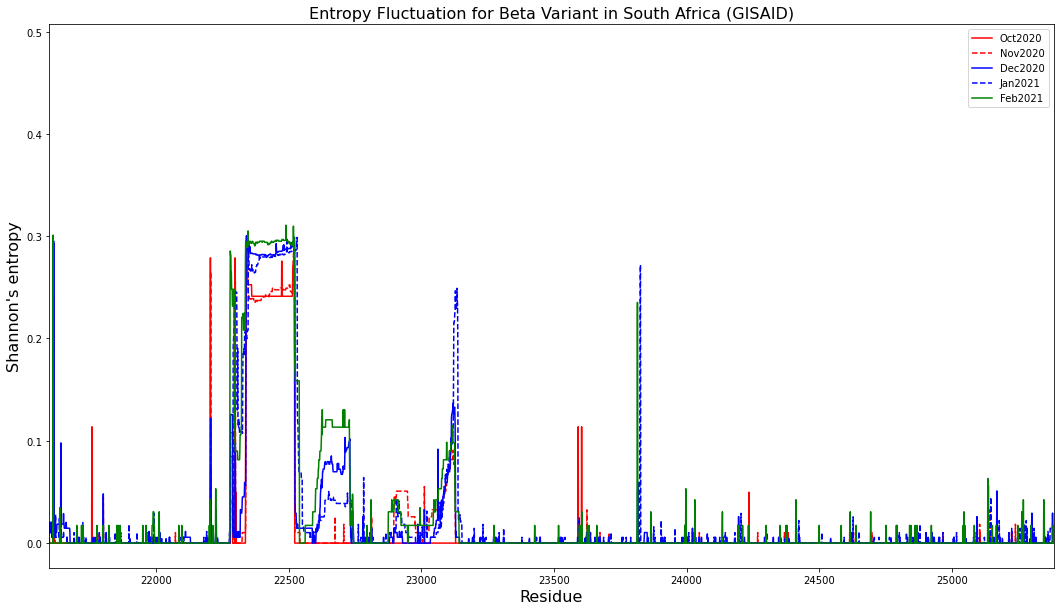

In [1]:
#importing the relevant packages
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
from Bio import AlignIO
import warnings
warnings.filterwarnings("ignore")

#function to calculate the Shannon Entropy of a MSA
# H = -sum[p(x).log2(px)]

def shannon_entropy(list_input):
    unique_aa = set(list_input)   
    M = len(list_input)
    entropy_list = []
    # Number of residues in column
    for aa in unique_aa:
        n_i = list_input.count(aa)                                           
        P_i = n_i/float(M)                                
        entropy_i = P_i*(math.log(P_i,10))
        entropy_list.append(entropy_i)
    sh_entropy = -(sum(entropy_list))
    #print(sh_entropy)
    return sh_entropy

#importing the MSA file
#importing the clustal file
align_clustal1 = AlignIO.read("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/Beta/beta_variant_south_africa_oct2020_clustal.aln","clustal")
align_clustal2 = AlignIO.read("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/Beta/beta_variant_south_africa_nov2020_clustal.aln", "clustal")
align_clustal3 = AlignIO.read("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/Beta/beta_variant_south_africa_dec2020_clustal.aln", "clustal")
align_clustal4 = AlignIO.read("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/Beta/beta_variant_south_africa_jan2021_clustal.aln","clustal")
align_clustal5 = AlignIO.read("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/Beta/beta_variant_south_africa_feb2021_clustal.aln","clustal")

def shannon_entropy_list_msa(alignment_file):
    shannon_entropy_list = []
    for col_no in range(len(list(alignment_file[0]))):
        list_input = list(alignment_file[:, col_no])
        shannon_entropy_list.append(shannon_entropy(list_input))
    return shannon_entropy_list

clustal_omega1 = shannon_entropy_list_msa(align_clustal1)
clustal_omega2 = shannon_entropy_list_msa(align_clustal2)
clustal_omega3 = shannon_entropy_list_msa(align_clustal3)
clustal_omega4 = shannon_entropy_list_msa(align_clustal4)
clustal_omega5 = shannon_entropy_list_msa(align_clustal5)

#print(clustal_omega1)
# Plotting the data
plt.figure(figsize=(18,10))
plt.plot(clustal_omega1, 'r' ,label="Oct2020")
plt.plot(clustal_omega2, 'r--', label="Nov2020")
plt.plot(clustal_omega3, 'b', label="Dec2020")
plt.plot(clustal_omega4, 'b--', label="Jan2021")
plt.plot(clustal_omega5, 'g' ,label="Feb2021")
plt.xlabel('Residue', fontsize=16)
plt.ylabel("Shannon's entropy", fontsize=16)
plt.legend()
plt.xlim(21596,25384)
plt.title("Entropy Fluctuation for Beta Variant in South Africa (GISAID)", fontsize=16)
plt.show()

In [16]:
import csv
list1 = np.arange(21563,25385)
list2 = clustal_omega5[21563:25385]
with open('/home/satyam/Documents/Entropy_Comparison/GISAID/foo.csv', "w") as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        writer.writerow(['A', 'B'])
        for i in range(len(list1)):
            writer.writerow([list1[i],list2[i]])

In [1]:
import pandas as pd
df = pd.read_csv("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/Beta/Response/beta_data.csv")
df.head()

,position,oct,nov,dec,jan,feb,sum,s_bar,diff1,diff2,...,diff4,diff5,sq1,sq2,sq3,sq4,sq5,num_sum,num,final
0,21563,0.0,0.01842,0.165703,0.120993,0.185317,0.490434,0.098087,-0.098087,-0.079666,...,0.022906,0.08723,0.009621,0.006347,0.004572,0.000525,0.007609,0.028674,0.005735,0.058465736193852
1,21564,0.0,0.01842,0.165703,0.120993,0.185317,0.490434,0.098087,-0.098087,-0.079666,...,0.022906,0.08723,0.009621,0.006347,0.004572,0.000525,0.007609,0.028674,0.005735,0.058465736193852
2,21565,0.0,0.01842,0.165703,0.120993,0.185317,0.490434,0.098087,-0.098087,-0.079666,...,0.022906,0.08723,0.009621,0.006347,0.004572,0.000525,0.007609,0.028674,0.005735,0.058465736193852
3,21566,0.0,0.01842,0.165703,0.120993,0.185317,0.490434,0.098087,-0.098087,-0.079666,...,0.022906,0.08723,0.009621,0.006347,0.004572,0.000525,0.007609,0.028674,0.005735,0.058465736193852
4,21567,0.0,0.01842,0.165703,0.120993,0.185317,0.490434,0.098087,-0.098087,-0.079666,...,0.022906,0.08723,0.009621,0.006347,0.004572,0.000525,0.007609,0.028674,0.005735,0.058465736193852


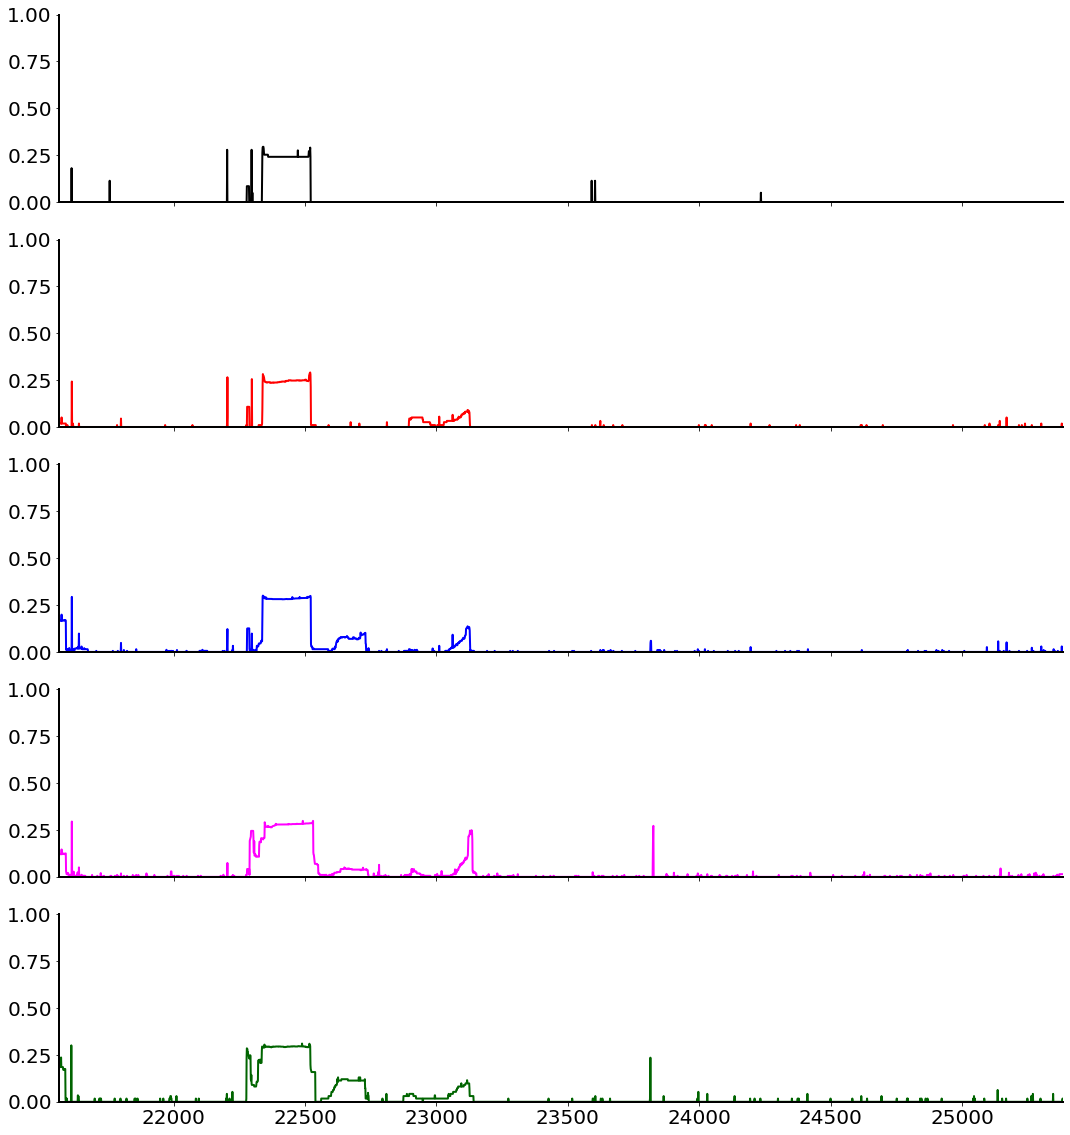

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5, sharex=True, sharey=True, figsize=(18,20))
axs[0].spines['right'].set_color(None)
axs[0].spines['top'].set_color(None)
axs[0].spines['left'].set_linewidth(2)
axs[0].spines['bottom'].set_linewidth(2)
axs[1].spines['right'].set_color(None)
axs[1].spines['top'].set_color(None)
axs[1].spines['left'].set_linewidth(2)
axs[1].spines['bottom'].set_linewidth(2)
axs[2].spines['right'].set_color(None)
axs[2].spines['top'].set_color(None)
axs[2].spines['left'].set_linewidth(2)
axs[2].spines['bottom'].set_linewidth(2)
axs[3].spines['right'].set_color(None)
axs[3].spines['top'].set_color(None)
axs[3].spines['left'].set_linewidth(2)
axs[3].spines['bottom'].set_linewidth(2)
axs[4].spines['right'].set_color(None)
axs[4].spines['top'].set_color(None)
axs[4].spines['left'].set_linewidth(2)
axs[4].spines['bottom'].set_linewidth(2)
axs[0].plot(df["position"], df["oct"], 'black', linewidth=2.0)
axs[1].plot(df["position"], df["nov"], 'red', linewidth=2.0)
axs[2].plot(df["position"], df["dec"], 'blue', linewidth=2.0)
axs[3].plot(df["position"], df["jan"], 'magenta', linewidth=2.0)
axs[4].plot(df["position"], df["feb"], 'darkgreen', linewidth=2.0)
axs[0].tick_params(axis='y', labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
axs[2].tick_params(axis='y', labelsize=20)
axs[3].tick_params(axis='y', labelsize=20)
axs[4].tick_params(axis='y', labelsize=20)
axs[4].tick_params(axis='x', labelsize=20)
plt.ylim(0,1)
plt.xlim(21563, 25385)
plt.savefig("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/Beta/Response/beta_variant_timeline.png", dpi=300)
plt.show()

In [7]:
df2 = pd.read_csv("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/Beta/Response/beta_variant_final_fluctuation.csv")
df2.head()

,pos,final
0,21563,0.058466
1,21564,0.058466
2,21565,0.058466
3,21566,0.058466
4,21567,0.058466


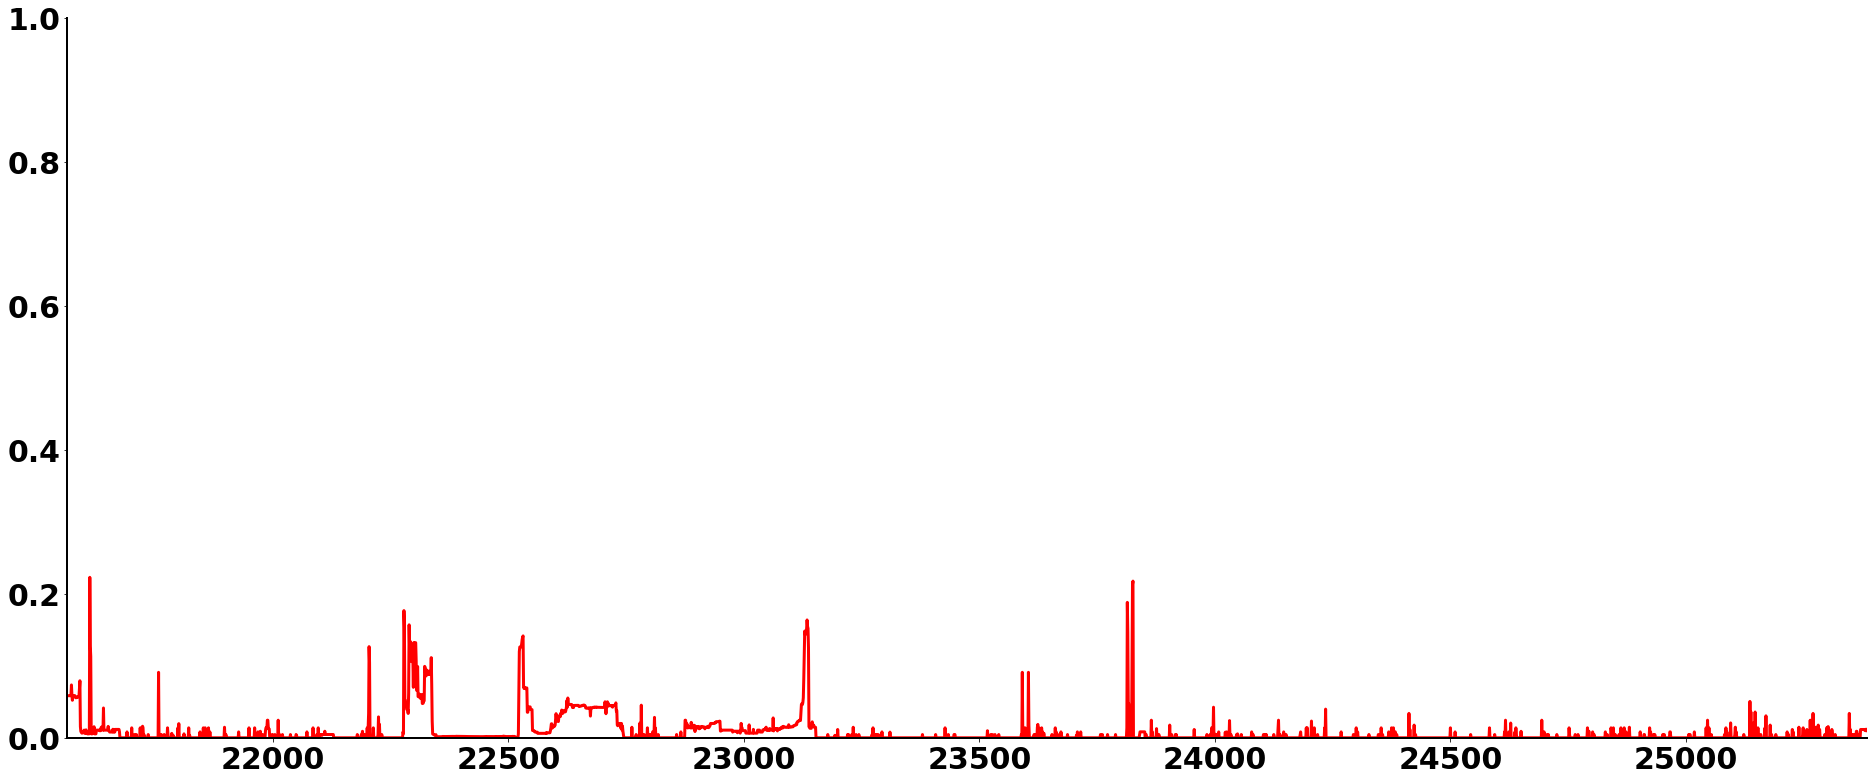

In [9]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)
ax.plot(df2["pos"],df2["final"], 'red', linewidth=3.0)
ax.set_xlim(21563,25385)
ax.set_ylim(0,1)
plt.xticks(fontsize=30, weight="bold")
plt.yticks(fontsize=30, weight="bold")
plt.savefig("/home/satyam/Documents/Projects/Entropy_Comparison/GISAID/South_Africa/Beta/Response/beta_variant_final_fluctuation.png", bbox_inches='tight',dpi=300)
plt.show()